In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(0)

In [18]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=5000, n_features=1, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

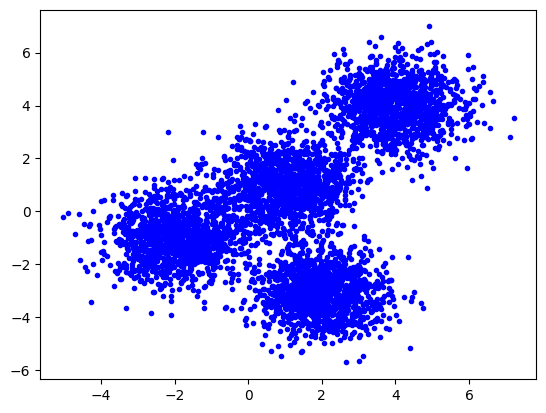

In [26]:
plt.scatter(x[:, 0], x[:, 1], marker='.', color='blue')

In [27]:
x.shape

(5000, 2)

In [37]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=3)

In [38]:
model.fit(x)

KMeans(n_clusters=3, random_state=3)

In [39]:
k_means_labels = model.labels_
k_means_labels

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [40]:
clustercenters = model.cluster_centers_
print(clustercenters)

[[-0.77585657 -0.17965046]
 [ 3.68384223  3.67797687]
 [ 1.96181214 -2.97264238]]


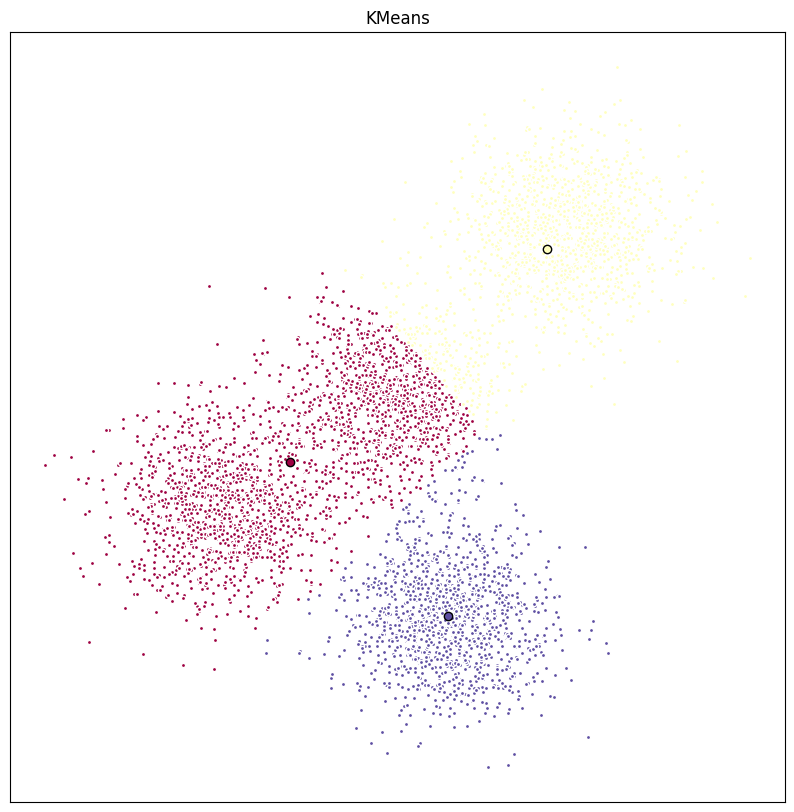

In [41]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 10))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = clustercenters[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
